# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import your libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [2]:
# Your code here
mu, sigma = 50, 5

sample_size = pd.Series([10, 50, 500, 5000, 50000])

dists = sample_size.apply(lambda s: np.random.normal(mu, sigma, s))

tests = dists.apply(lambda d: stats.normaltest(d))

tests

/home/iudh/.local/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


0       (1.187959500087278, 0.5521255847127252)
1    (0.015523506116669864, 0.9922682915637027)
2       (1.322050573802948, 0.5163216851560964)
3        (3.048879553154167, 0.217743007435202)
4    (0.010732881597728977, 0.9946479328213378)
dtype: object

#### Interpret the normaltest results and make your observations.

Explain the test results here

El segundo valor que devuelve scipy en la tupla es el p-valor. De manera general, 
si el p-valor es mayor que el 5% (0.05) no se puede rechazar la hipotesis nula,
es decir, si es mayor que 0.05 es Normal.
A la inversa no es exacto, puesto que no se puede afirmar con rotundidad que no sean normales,
pero es una buena aproximacion.
El primer valor de la tupla es la verosimilitud, aunque no puede afirmarse nada mirando
solo este valor.


#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

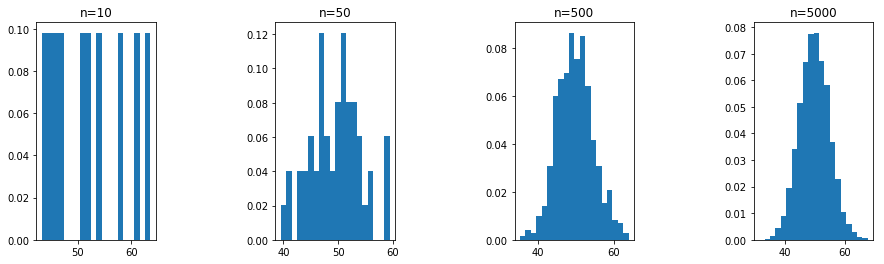

In [3]:
# Your code here
f, ax = plt.subplots(1, 4)

f.set_figwidth(15)

f.subplots_adjust(wspace=1)

for i in range(0, 4):
    ax[i].set_title('n=%s' % (sample_size[i]))
    count, bins, ignored = ax[i].hist(dists[i], 20, density=True)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

Your comment and explanation here

El teorema central del limite dice que si el tamaño de la muestra es mayor que 30, la
distribucion de probabilidad converge casi seguro a la Normal. Asi pues, cuanto mas crece n, el
tamaño muestral, mas se parece la distribucion a una campana de Gauss.

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

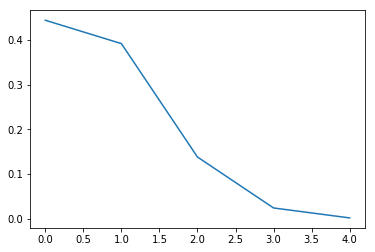

In [4]:
# Your code here
from scipy.stats import binom

n, p = 5, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### Explain what you observe from the plot above

Your comment here

Lo que expresa el grafico anterior es que los mas probable es que nadie vea la publicidad 
de youtube, que la probabilidad de que solo una persona vea la publicidad es mucho mas
alta que la probabilidad de que la vean dos personas y que tiende a cero para tres
personas o mas.

#### Now plot PMP with 50, 500, and 5000 visitors.

7.5
75.0
750.0


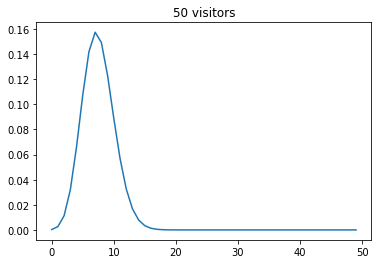

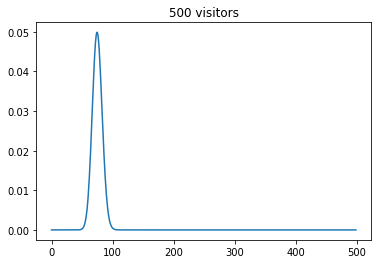

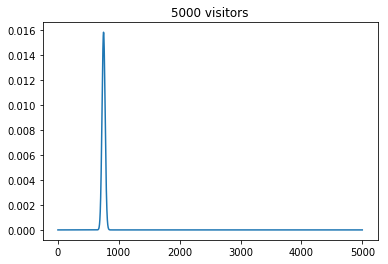

In [5]:
# Your code here

n, p = 50, 0.15
x = range(n)
dist = binom(n, p)
fig, ax = plt.subplots(1, 1)
plt.title('50 visitors')
plt.plot(x, dist.pmf(x))
print (50*0.15)

n, p = 500, 0.15
x = range(n)
dist = binom(n, p)
fig, ax = plt.subplots(1, 1)
plt.title('500 visitors')
plt.plot(x, dist.pmf(x))
print (500*0.15)

n, p = 5000, 0.15
x = range(n)
dist = binom(n, p)
fig, ax = plt.subplots(1, 1)
plt.title('5000 visitors')
plt.plot(x, dist.pmf(x))
print (5000*0.15)

plt.show()

#### What did you notice from the distribution plots? Comment your findings.

Your comment here


La distribucion de probabilidad se va estrechando cada vez mas, segun aumenta el numero
de visitantes, y convergiendo al 15% (0.15) de dicho numero, que es la probabilidad de que 
un visitante vea la publicidad.

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

Your comment here

A la distribucion de Poisson se la conoce tambien como ley de sucesos raros. Se usa, precisamente,
para describir eventos raros, tales como fallos de produccion o los goles marcados por 
un equipo de futbol. Es una distribucion equidispersa, es decir, su esperanza (la media) coincide 
con su varianza, lo que a veces da un error bastante amplio. Es el caso limite de la distribucion
binomial, cuando el numero de repeticiones tiende a infinito y la probabilidad tiende a cero.

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

La probabilidad de 320 visitantes es 0.011612348610402475


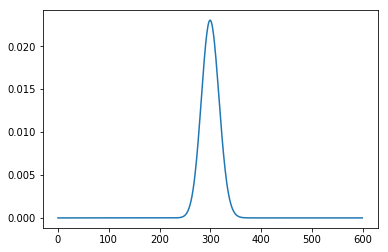

In [7]:
# Your code here

from scipy.stats import poisson

lamb=300
x = range(2*lamb)
dist = poisson(lamb)
print ('La probabilidad de 320 visitantes es {}'.format(dist.pmf(320)))

fig, ax = plt.subplots(1, 1)
plt.plot(x, dist.pmf(x));

#### What is the probability of getting 60 visits?

In [8]:
# Your code here

print ('La probabilidad de 60 visitantes es {}'.format(dist.pmf(60))) # practicamente cero
# al ser tan grande la media, la distribucion de Poisson tiende a la Binomial (o Normal).

La probabilidad de 60 visitantes es 2.622743762294515e-64


#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

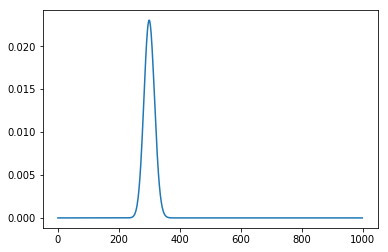

In [10]:
# your code here
from scipy.stats import poisson

N = np.arange(1000)

rv = poisson(300)

arr = []

for n in N:
    arr.append(rv.pmf(n))

plt.plot(arr);